In [6]:
%pip install beautifulsoup4
%pip install requests
%pip install yfinance
%pip install datetime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for datetime from https://files.pythonhosted.org/packages/95/88/3b9d4042b396221a132180b392ab2a174031a6fb579f7927f3909fc183a7/DateTime-5.2-py3-none-any.whl.metadata
  Obtaining dependency information for zope.interface from https://files.pythonhosted.org/packages/0f/d5/81f9789311d9773a02ed048af7452fc6cedce059748dba956c1dc040340a/zope.interface-6.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ---------------------------------------- 42.8/42.8 kB 2.2 MB/s eta 0:00:00
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
  Using cached setuptools-68.2.2-py3-none-any.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/52.2 kB ? eta -:--:--
   ---------------------------------------- 52.2/52.2 kB 2.6 MB/s eta 0:00:00
   ---


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bs4 as bs
import requests
import yfinance as yf
import datetime

In [40]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []

for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)
print(tickers)

['MMM\n', 'AOS\n', 'ABT\n', 'ABBV\n', 'ACN\n', 'ADM\n', 'ADBE\n', 'ADP\n', 'AES\n', 'AFL\n', 'A\n', 'ABNB\n', 'APD\n', 'AKAM\n', 'ALK\n', 'ALB\n', 'ARE\n', 'ALGN\n', 'ALLE\n', 'LNT\n', 'ALL\n', 'GOOGL\n', 'GOOG\n', 'MO\n', 'AMZN\n', 'AMCR\n', 'AMD\n', 'AEE\n', 'AAL\n', 'AEP\n', 'AXP\n', 'AIG\n', 'AMT\n', 'AWK\n', 'AMP\n', 'AME\n', 'AMGN\n', 'APH\n', 'ADI\n', 'ANSS\n', 'AON\n', 'APA\n', 'AAPL\n', 'AMAT\n', 'APTV\n', 'ACGL\n', 'ANET\n', 'AJG\n', 'AIZ\n', 'T\n', 'ATO\n', 'ADSK\n', 'AZO\n', 'AVB\n', 'AVY\n', 'AXON\n', 'BKR\n', 'BALL\n', 'BAC\n', 'BBWI\n', 'BAX\n', 'BDX\n', 'WRB\n', 'BRK.B\n', 'BBY\n', 'BIO\n', 'TECH\n', 'BIIB\n', 'BLK\n', 'BX\n', 'BK\n', 'BA\n', 'BKNG\n', 'BWA\n', 'BXP\n', 'BSX\n', 'BMY\n', 'AVGO\n', 'BR\n', 'BRO\n', 'BF.B\n', 'BG\n', 'CHRW\n', 'CDNS\n', 'CZR\n', 'CPT\n', 'CPB\n', 'COF\n', 'CAH\n', 'KMX\n', 'CCL\n', 'CARR\n', 'CTLT\n', 'CAT\n', 'CBOE\n', 'CBRE\n', 'CDW\n', 'CE\n', 'COR\n', 'CNC\n', 'CNP\n', 'CDAY\n', 'CF\n', 'CRL\n', 'SCHW\n', 'CHTR\n', 'CVX\n', 'CMG\n', '

In [64]:
tickers = [s.replace('\n', '') for s in tickers]
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADM', 'ADBE', 'ADP', 'AES', 'AFL', 'A', 'ABNB', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CM

In [65]:
start = datetime.datetime(2018, 7, 1)
end = datetime.datetime(2023, 6, 30)
data = yf.download(tickers, start=start, end=end)
data

[*********************100%%**********************]  503 of 503 completed


3 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-01 00:00:00 -> 2023-06-30 00:00:00)')
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1530417600, endDate = 1688097600")


Adj Close                                                 \
                     A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2018-07-02   59.138565  37.547699   44.660519   72.200829         NaN   
2018-07-03   58.926903  36.950615   43.882687   72.588562         NaN   
2018-07-05   59.456043  37.185535   44.235817   73.263176         NaN   
2018-07-06   59.927467  37.283413   44.849007   75.155243         NaN   
2018-07-09   60.725990  38.477585   45.471741   75.248306         NaN   
...                ...        ...         ...         ...         ...   
2023-06-23  118.952553  16.260000  186.428238  133.097458  124.730003   
2023-06-26  117.906670  16.440001  185.020157  132.147598  123.129997   
2023-06-27  116.581879  17.350000  187.806381  129.846405  127.889999   
2023-06-28  115.914497  17.549999  188.994781  129.758255  127.629997   
2023-06-29  117.587921  17.600000  189.334320  130.463318  125.099998   

                                                                       ...  \
                   ABT       ACGL         ACN        ADBE         ADI  ...   
Date                                                                   ...   
2018-07-02   55.612404  26.629999  150.807236  243.259995   87.108978  ...   
2018-07-03   55.439175  26.760000  150.908859  242.009995   85.480927  ...   
2018-07-05   55.913242  26.930000  152.257782  244.179993   87.190369  ...   
2018-07-06   56.669941  27.280001  151.989822  248.190002   87.913956  ...   
2018-07-09   56.925217  27.889999  153.486542  249.770004   87.895859  ...   
...                ...        ...         ...         ...         ...  ...   
2023-06-23  106.942284  72.410004  296.122650  484.720001  185.060318  ...   
2023-06-26  107.397560  71.220001  295.110535  479.510010  185.458420  ...   
2023-06-27  106.684944  71.139999  298.484253  489.269989  191.469849  ...   
2023-06-28  106.506790  71.680000  299.387238  482.429993  189.001572  ...   
2023-06-29  106.556282  73.029999  305.946106  483.769989  188.583572  ...   

             Volume                                                         \
               WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2018-07-02  6755000  2826200   9998300  1911100  1005100  1599100   792997   
2018-07-03  2227700  1811300   7197300  1435600   755800   968300   534776   
2018-07-05  2626100  2574300   9035700  3017000  1860300  1431000   708949   
2018-07-06  2048800  2193800   7637100  1765200  1219800  1392600   958209   
2018-07-09  4568900  4289700   7158600  2151700  1038700  1598400   595340   
...             ...      ...       ...      ...      ...      ...      ...   
2023-06-23  1785900  5325300  17933600  2223100  2135100  6219800  1560600   
2023-06-26  1482800  4010800  14283400  1000800  1529900  1486300  1110000   
2023-06-27  1111000  3287600  13227500  1602500  1574500  1593100   855300   
2023-06-28  1470900  2965400  13084100  1263100  1174400  1174600  1019800   
2023-06-29  1354700  2881900  11364400   995300   958700  1525200  1169900   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2018-07-02  594000  2197500  1759000  
2018-07-03  324200   886700  1283500  
2018-07-05  448300  1625200  2474600  
2018-07-06  150500  1476500  2073600  
2018-07-09  286300  1937700  1836800  
...            ...      ...      ...  
2023-06-23  657000  3829100  2412100  
2023-06-26  285500  2154000  1729200  
2023-06-27  356800  2377700  1452300  
2023-06-28  300600  2500000  1686800  
2023-06-29  310000  2917900  1429000  

[1257 rows x 3018 columns]

[*********************100%%**********************]  503 of 503 completed


3 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-01 -> 2023-06-30)')
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1530417600, endDate = 1688097600")


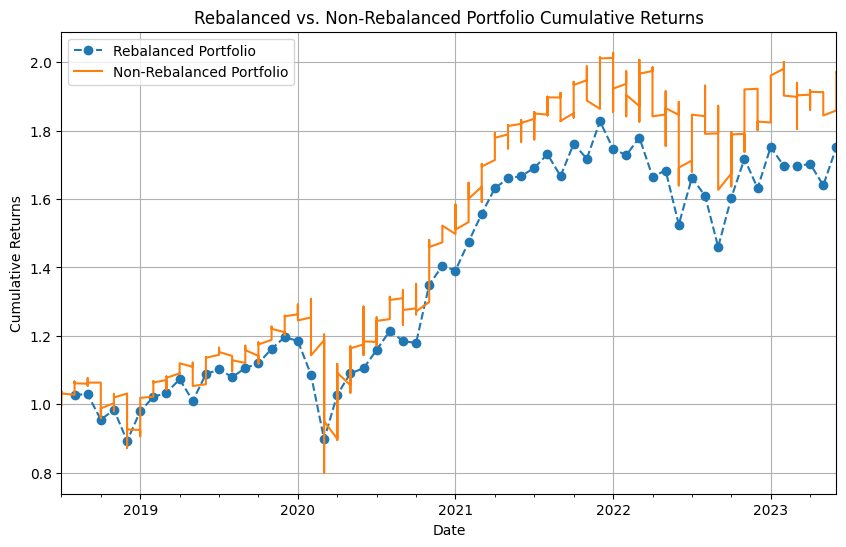

In [77]:

FEE_RATE = 0.001  # 0.1% fee

def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    # Ensure the index is a DatetimeIndex
    data.index = pd.to_datetime(data.index)
    return data

def drop_invalid_stocks(data):
    # Drop stocks with any NaN or 0 values
    data = data.dropna(axis=1)
    data = data.loc[:, (data != 0).all(axis=0)]
    return data

def backtest_portfolio(data, rebalance=True):
    # Calculate daily returns
    daily_returns = data.pct_change().dropna()

    # Assuming equal weights for all stocks
    initial_weights = [1/len(daily_returns.columns)] * len(daily_returns.columns)

    if rebalance:
        # Rebalance monthly
        monthly_returns = data.resample('M').last().pct_change().dropna()
        # Deduct fee for each rebalance
        monthly_returns -= FEE_RATE
        portfolio_monthly_returns = monthly_returns.dot(initial_weights)
        cumulative_returns = (1 + portfolio_monthly_returns).cumprod()
    else:
        # No rebalancing, let weights drift
        # Deduct fee only at the beginning
        daily_returns.iloc[0] -= FEE_RATE
        portfolio_daily_returns = daily_returns.dot(initial_weights)
        cumulative_returns = (1 + portfolio_daily_returns).cumprod()

    return cumulative_returns

def main():
    # Assuming you have a list of tickers in the variable 'tickers'
    # tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', ...]  # Your list of tickers
    start_date = '2018-07-01'
    end_date = '2023-06-30'

    # Fetch data
    data = fetch_data(tickers, start_date, end_date)

    # Drop invalid stocks
    data = drop_invalid_stocks(data)

    # Backtest portfolios
    rebalanced_returns = backtest_portfolio(data, rebalance=True)
    non_rebalanced_returns = backtest_portfolio(data, rebalance=False)

    # Plot results
    plt.figure(figsize=(10, 6))
    rebalanced_returns.plot(label='Rebalanced Portfolio', linestyle='--', marker='o')
    non_rebalanced_returns.plot(label='Non-Rebalanced Portfolio')
    plt.title('Rebalanced vs. Non-Rebalanced Portfolio Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    main()